# Sorting Arrays
## Started 01/25/2018

__Selection sort__ finds minimum value from a list and swaps it to the position of the list that it's currently indexed to. The value that was at the indexed position get moved to the location of the minimum value. Must go through every item in the list, and find the min value in the entire list, so computation time scales in proportion to the square of the number of items.

In [1]:
import numpy as np

In [2]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:]) #argmin gives index of min value
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [3]:
x = np.array([3, 2, 1, 4, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [4]:
y = np.array([2, 1, 4, 3, 5])
selection_sort(y)

array([1, 2, 3, 4, 5])

Here's a fun one:

In [5]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        print("reversed: ", x[:-1])
        print("x[1:]: ", x[1:])
        np.random.shuffle(x)
    return x

In [6]:
c
bogosort(x)

NameError: name 'c' is not defined

In [ ]:
# computation time based on chance!

## Numpy built in sort functions that are faster
``np.sort`` <br>
``np.argsort``

In [ ]:
x = np.array([3, 2, 1, 4, 5])
np.sort(x) #returns sorted array, but doesn't modify x

In [ ]:
x

In [ ]:
# to sort the array in place, use sort on the np array
x.sort()
print(x)

In [ ]:
x = np.array([3, 2, 1, 4, 5])
i = np.argsort(x) #returns the index into x to make a sorted list
print(i)

In [ ]:
y = x[i]
y

In [ ]:
# can provide an axis argument 

## Re-doing sorting k nearest exercise from yesterday

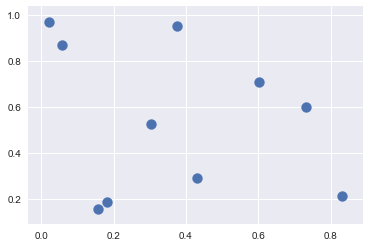

In [14]:
# givens
rand = np.random.RandomState(42)
X = rand.rand(10, 2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:,1], s=100)

In [15]:
# broadcast element difference table
XRows = X[:, np.newaxis, :]
XColumns = X[np.newaxis, :, :]
print(XRows.shape)
print(XColumns.shape)
diff = XRows - XColumns
print(diff.shape)

(10, 1, 2)
(1, 10, 2)
(10, 10, 2)


Duplicated X and added an extra dimension to each copy. By subtracting one from the other, numpy broadcasts the arrays, and we're left with two 10x10 matrices, one holding the differences between X values, the other between Y values (first column of X were plotted as X values, second column of X as Y values).

In [22]:
sqdiff = diff ** 2 #(10, 10, 2)
print(sqdiff.shape)
sumsqdiff = np.sum(sqdiff, -1)
print(sumsqdiff.shape)

(10, 10, 2)
(10, 10)


In [23]:
sumsqdiff

array([[ 0.        ,  0.25171654,  0.67933117,  0.10729142,  0.11021119,
         0.12565305,  0.75487265,  0.62590345,  0.1863819 ,  0.43821601],
       [ 0.25171654,  0.        ,  0.52769893,  0.52572083,  0.02910074,
         0.64393098,  0.1593326 ,  0.47512176,  0.18843303,  0.18454216],
       [ 0.67933117,  0.52769893,  0.        ,  0.51394921,  0.50290096,
         0.68080058,  0.46072414,  0.00141727,  0.15795558,  0.09442377],
       [ 0.10729142,  0.52572083,  0.51394921,  0.        ,  0.31987984,
         0.01216687,  1.02713477,  0.48148903,  0.17716149,  0.47033641],
       [ 0.11021119,  0.02910074,  0.50290096,  0.31987984,  0.        ,
         0.40557444,  0.29926414,  0.45108072,  0.12173825,  0.20237694],
       [ 0.12565305,  0.64393098,  0.68080058,  0.01216687,  0.40557444,
         0.        ,  1.23302708,  0.64458914,  0.27862329,  0.62982499],
       [ 0.75487265,  0.1593326 ,  0.46072414,  1.02713477,  0.29926414,
         1.23302708,  0.        ,  0.42414057

So a difference between all Xs and Ys, squared, and added together, is all the hypotenuses (distances) between each point. With a 10x10 matrix, what we have is an entry for every point in our original 10x2 array, where each row is the distance from a point in our original matrix to every other point. 10 rows, 10 points in the original. Redundancies and 0s because a point is 0 from itself, and because the distance from point 1 to point 2 should also be shown in the row for point 2, as the distance from point 2 to point 1. 

In [25]:
distrank = np.argsort(sumsqdiff)
print(distrank)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [26]:
K = 2
ksort = np.argpartition(sumsqdiff, K + 1, axis=1)

In [28]:
print(ksort)

[[3 0 4 5 8 9 1 7 2 6]
 [1 4 6 9 3 5 2 7 8 0]
 [2 7 9 8 6 4 5 1 3 0]
 [3 5 0 8 4 1 6 7 2 9]
 [1 4 0 8 9 6 2 7 5 3]
 [5 3 0 8 4 1 6 7 2 9]
 [1 9 6 4 3 5 2 7 8 0]
 [7 2 9 8 6 4 5 1 3 0]
 [8 9 4 7 2 3 0 1 5 6]
 [8 7 9 2 1 6 4 5 3 0]]


In [33]:
print(X)

[[ 0.37454012  0.95071431]
 [ 0.73199394  0.59865848]
 [ 0.15601864  0.15599452]
 [ 0.05808361  0.86617615]
 [ 0.60111501  0.70807258]
 [ 0.02058449  0.96990985]
 [ 0.83244264  0.21233911]
 [ 0.18182497  0.18340451]
 [ 0.30424224  0.52475643]
 [ 0.43194502  0.29122914]]


In [36]:
for i in range(X.shape[0]):
    for j in ksort[i, :K+1]:
        print("X1, Y1: ", X[j], " X2, Y2: ", X[i])
        

X1, Y1:  [ 0.05808361  0.86617615]  X2, Y2:  [ 0.37454012  0.95071431]
X1, Y1:  [ 0.37454012  0.95071431]  X2, Y2:  [ 0.37454012  0.95071431]
X1, Y1:  [ 0.60111501  0.70807258]  X2, Y2:  [ 0.37454012  0.95071431]
X1, Y1:  [ 0.73199394  0.59865848]  X2, Y2:  [ 0.73199394  0.59865848]
X1, Y1:  [ 0.60111501  0.70807258]  X2, Y2:  [ 0.73199394  0.59865848]
X1, Y1:  [ 0.83244264  0.21233911]  X2, Y2:  [ 0.73199394  0.59865848]
X1, Y1:  [ 0.15601864  0.15599452]  X2, Y2:  [ 0.15601864  0.15599452]
X1, Y1:  [ 0.18182497  0.18340451]  X2, Y2:  [ 0.15601864  0.15599452]
X1, Y1:  [ 0.43194502  0.29122914]  X2, Y2:  [ 0.15601864  0.15599452]
X1, Y1:  [ 0.05808361  0.86617615]  X2, Y2:  [ 0.05808361  0.86617615]
X1, Y1:  [ 0.02058449  0.96990985]  X2, Y2:  [ 0.05808361  0.86617615]
X1, Y1:  [ 0.37454012  0.95071431]  X2, Y2:  [ 0.05808361  0.86617615]
X1, Y1:  [ 0.73199394  0.59865848]  X2, Y2:  [ 0.60111501  0.70807258]
X1, Y1:  [ 0.60111501  0.70807258]  X2, Y2:  [ 0.60111501  0.70807258]
X1, Y1

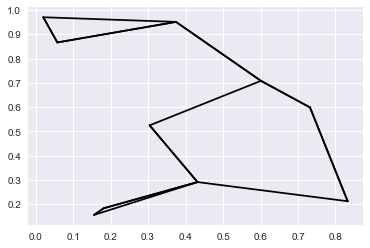

In [35]:
# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in ksort[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## End 01/26/2018